# Principal Component Analysis (PCA)



In this notebook we will be going over the **Principal Component Analysis** without much focus on the theory just mentioning it lightly, for the full theory and linear algbera interpretation of **PCA** check the **Dimension Reduction** Folder in the github repo.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA steps : 
1. Centering the data by substracting off the mean from each observation $X-\bar{X}$
2. Calculate the **SVD** or the **eigenvectors** of the covariance matrix which represent the **principal Componenets**(handled by `sklearn`)
3. Calculate the principal Componenets Scores (Projecting Data onto the new axes) 

## Feature Scaling 

In [2]:
X = np.array([[1,3,2],[5,1,3],[22,3,5],[13,21,0],[2,4,10],[9,11,1]])
X

array([[ 1,  3,  2],
       [ 5,  1,  3],
       [22,  3,  5],
       [13, 21,  0],
       [ 2,  4, 10],
       [ 9, 11,  1]])

In [3]:
X_centered = StandardScaler().fit_transform(X)
X_centered

array([[-1.06091089, -0.60053832, -0.45398995],
       [-0.50739216, -0.88879672, -0.15132998],
       [ 1.84506242, -0.60053832,  0.45398995],
       [ 0.59964529,  1.99378723, -1.05930987],
       [-0.92253121, -0.45640913,  1.96728976],
       [ 0.04612656,  0.55249526, -0.75664991]])

- Now our data is **Standardized** with mean $\mu=0$ and standard deviation $\sigma=1$
- It Centers data around the **mean**
- Preserves the **relationships** between the data points
- Changes the shape of the original **distribution** 

In [4]:
X_centered.shape

(6, 3)

- Our data set has $n=6$ observations and $p=3$, keep it in mind sine the **PCA** will reduce the dimensionality of this matrix to be more intrepretable and easy to visualize

## Fitting PCA

In [5]:
pca_one_dim = PCA(n_components=1,svd_solver='full')
pca_two_dim = PCA(n_components=2,svd_solver='full')
pca_one_dim.fit(X_centered)
pca_two_dim.fit(X_centered);

In [6]:
pca_one_dim

,n_components,1
,copy,True
,whiten,False
,svd_solver,'full'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [7]:
pca_two_dim

,n_components,2
,copy,True
,whiten,False
,svd_solver,'full'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


- Here we gonan fit two **PCA** instances for one dimension and for two dimension represented by `n_components` which where our data will be projected onto
- Using the `svd_solver='full'` since **PCA** is simply a statistical intrepretation of **Singular Value Decomposition** 
- 

In [8]:
print(pca_one_dim.explained_variance_ratio_)

[0.56540338]


In [9]:
print(pca_two_dim.explained_variance_ratio_)

[0.56540338 0.28706397]


- **Explained Variance** a very important thing to notice while performing **PCA** since it shows:
    - How much each component explain the variance in the original data
    - The first component explains around $56\%$ of the variance
    - While the Second component explain only $28.7\%$ of the variance 

In [10]:
pca_three_dim = PCA(n_components=3,svd_solver='full')
pca_three_dim.fit(X_centered);
print(pca_three_dim.explained_variance_ratio_)

[0.56540338 0.28706397 0.14753265]


- As a stupid experiment but also good for intuition setting the `n_components=3` which is original dimension of our data set matrix `X`
- We can notice that the variance adds up to $100\%$ across all principal componenets
- They are ordered from the most important $\to$ the one that explains the maximum variance in the orignal data `X`

## Projecting the Data 

After finding the principal componenets of our data `X`, Now time to project or transform the data into the new axes(PCs) 

In [11]:
X_pca1 = pca_one_dim.transform(X_centered)
X_pca2 = pca_two_dim.transform(X_centered)
X_centered

array([[-1.06091089, -0.60053832, -0.45398995],
       [-0.50739216, -0.88879672, -0.15132998],
       [ 1.84506242, -0.60053832,  0.45398995],
       [ 0.59964529,  1.99378723, -1.05930987],
       [-0.92253121, -0.45640913,  1.96728976],
       [ 0.04612656,  0.55249526, -0.75664991]])

In [12]:
X_pca1

array([[-0.55391039],
       [-0.70137916],
       [ 0.09309616],
       [ 2.22506797],
       [-1.9196134 ],
       [ 0.85673882]])

In [13]:
X_pca2

array([[-0.55391039, -1.01237857],
       [-0.70137916, -0.3393901 ],
       [ 0.09309616,  1.95429003],
       [ 2.22506797, -0.27135082],
       [-1.9196134 ,  0.03358522],
       [ 0.85673882, -0.36475575]])

- These values are the projected coordinates or **Principal Components Scores** 

## Visualization 

One of the most important uses of **PCA** is visualization since we can't plot data with dimension more than 3 or 4 if we wanna stretch it, So **PCA** provide an sophesticated method to represent it in a lower dimensions 

Here we plotted our 3 dimensional data into a 2D graph which is easy to work with and interpret,and will help us decide on which statistical learning method we pick and the nature of data we dealing with, without mentioning the unsupervised use of **PCA**.

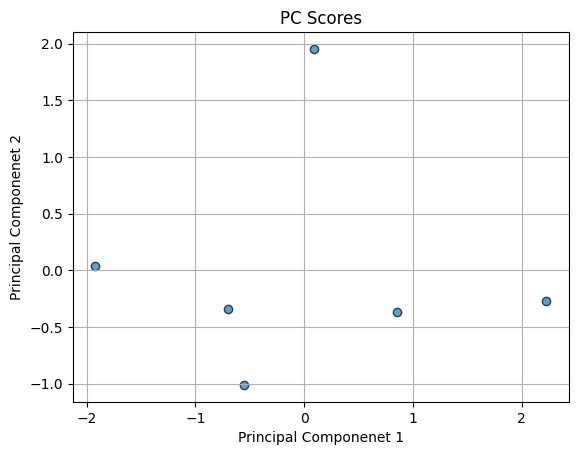

In [14]:
plt.scatter(X_pca2[:,0],X_pca2[:,1], alpha=0.7 ,edgecolors='k')
plt.xlabel('Principal Componenet 1')
plt.ylabel('Principal Componenet 2')
plt.title('PC Scores')
plt.grid(True)
plt.show();

For more intresting data and results let's import the `Breast Cancer` Dataset from `sklearn` which includes 30 features 

In [15]:
from sklearn.datasets import load_breast_cancer

In [91]:
data = load_breast_cancer()
X = data.data
y = data.target

In [17]:
df = pd.DataFrame(X,columns= data.feature_names)
df['target'] = y
target_names = data.target_names
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [18]:
target_names

array(['malignant', 'benign'], dtype='<U9')

- `maliginant` is a cancerous tumours that can spread to other parts of body
- `benign` is a non-cancerous tumours and do not spread to other body parts  

## Applying PCA on Breast Cancer Data

In [19]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

- As usual we scale the data before performing PCA
- with **Mean** $\mu=0$ and a standard deviation $\sigma=1$

In [167]:
# Scaled Data frame for our data set 
df_scaled = pd.DataFrame(X_scaled , columns=[f"{name}_scaled" for name in data.feature_names])

# Explained Variance Plot 
Let's plot the cummulative sum of explained variance ratio as we increase components, will help us decide on how many dimensions to keep 

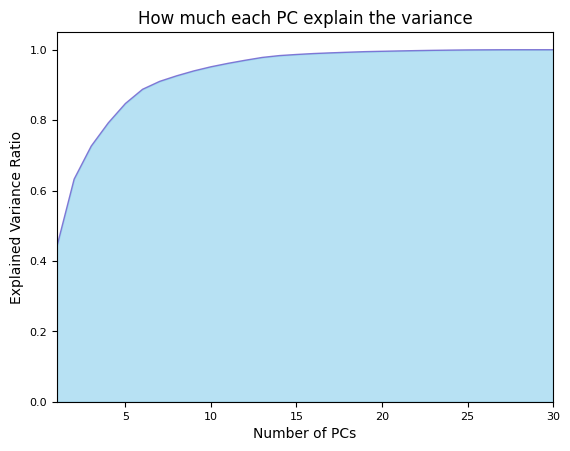

In [176]:
pca = PCA()
pca_full = pca.fit_transform(X_scaled)
# Explained Variance 
n_pcs = len(pca.explained_variance_ratio_)
exp_var_cumul= np.cumsum(pca.explained_variance_ratio_)
# Plotting 
plt.fill_between(range(1,n_pcs+1),exp_var_cumul,color="skyblue", alpha=0.6)
plt.plot(range(1,n_pcs+1),exp_var_cumul,color='Slateblue',alpha=0.8,linewidth=1)
plt.tick_params(labelsize=8)
plt.xticks(np.arange(31,step=5))
plt.xlabel("Number of PCs")
plt.ylabel("Explained Variance Ratio")
plt.title("How much each PC explain the variance")
plt.ylim(bottom=0)
plt.xlim(1,n_pcs)
plt.show();

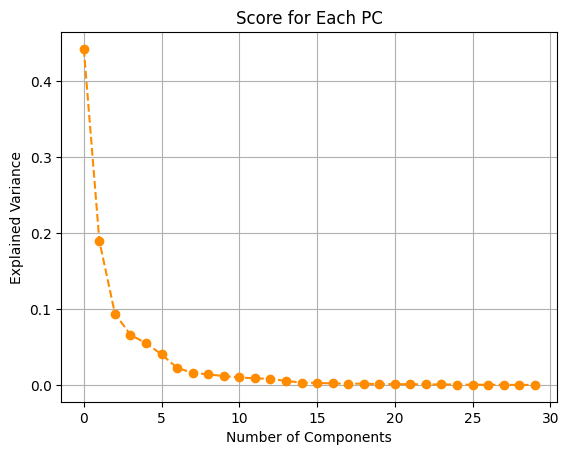

In [195]:
var = pca.explained_variance_ratio_
plt.plot(var,marker='o',color='darkorange',ls="--")
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Score for Each PC')
plt.grid(True)
plt.show();

- As this plot shows that selecting $3-4$ components will explain most of the variance on the data set 
- For simple plotting let's only select $2$ principle components

In [171]:
pca= PCA(n_components=2)
X_pca = pca.fit(X_scaled).transform(X_scaled)
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

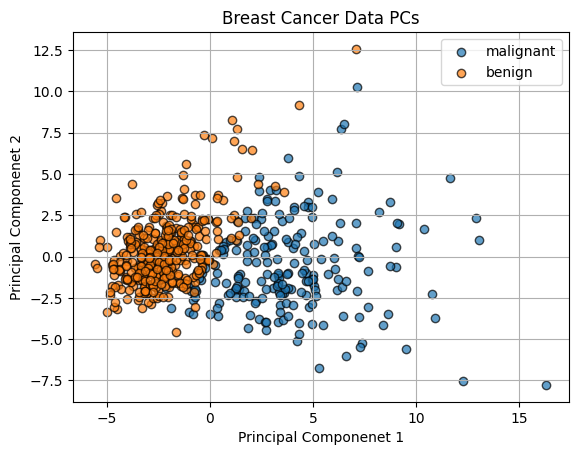

In [172]:
for label,target_name in zip(np.unique(y),target_names):
   plt.scatter(X_pca[y==label,0],X_pca[y==label,1],alpha=0.7,edgecolors='k',label=target_name)
plt.xlabel('Principal Componenet 1')
plt.ylabel('Principal Componenet 2')
plt.title('Breast Cancer Data PCs')
plt.legend()
plt.grid(True)
plt.show();

- Plotting the first two principal components agaisnt each other reveal some intresting patterns
- Looks like this data can be seperated using a linear boundary decision

In [36]:
# Eigen vectors of the covariance matrix 
print(pca.components_.shape)
eigen_vectors =pca.components_
# singular values 
explained_variance = pca.explained_variance_
print(explained_variance.shape)

(2, 30)
(2,)


- `pca.componenets_` represent the **eigen vectors** of the covariance matrix $X^TX$
- `pca.explained_variance_` represent the singular values on the diagonal matrix from the **Singular Value Decomposition** $\Sigma$

In [196]:
loadings = eigen_vectors.T * np.sqrt(explained_variance)
loadings.shape

(30, 2)

- The `loadings` represent the role each feature plays on the **Principal Component**
- they are the scaled version of the **eigenvectors**
- It shows the direction and the magnitude of the variance 
- Helps to detect the important features on the data set and **PCs**

In [197]:
importance = np.abs(loadings[:,0]) + np.abs(loadings[:,1])

print(importance)
pd.DataFrame({"PC1":loadings[:,0],"PC2":loadings[:,1],"importance":importance}, index=data.feature_names)

[1.35686227 0.52090936 1.34376559 1.35785607 0.96450259 1.23549739
 1.08620193 1.03450663 0.95848415 1.11006425 1.00336102 0.27841994
 0.98443453 1.10362493 0.5411348  1.17719585 1.03111693 0.9802094
 0.59400128 1.04291946 1.35662776 0.48962716 1.34042781 1.34399644
 0.87814045 1.10921121 1.06836693 0.9348481  0.78708944 1.13813843]


,PC1,PC2,importance
mean radius,0.798469,-0.558394,1.356862
mean texture,0.378346,-0.142564,0.520909
mean perimeter,0.829965,-0.513800,1.343766
mean area,0.806101,-0.551755,1.357856
mean smoothness,0.520110,0.444392,0.964503
mean compactness,0.872817,0.362680,1.235497
mean concavity,0.942542,0.143660,1.086202
mean concave points,0.951490,-0.083016,1.034507
mean symmetry,0.503978,0.454506,0.958484
mean fractal dimension,0.234772,0.875292,1.110064


- The `loadings` are between $[-1,1]$, cause they are cosine rotation of the original axes to the **PC** axes

In [198]:
# Loadings Plot (Bar Plot for loadings)